In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("../../data/insurance.csv")

In [3]:
df.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df = pd.get_dummies(df, drop_first=True)

In [24]:
x = df.drop(columns=['id', 'charges'])
y = df['charges']

x = x.astype("float32")
y = y.astype("float32")

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [70]:
batch_size = 32
epochs = 500

model = keras.Sequential([
    keras.Input(shape=(8,)),
    layers.Dense(10, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(20, activation="relu"),
    layers.Dense(1),
])

model.compile(loss="mae", optimizer="adam", metrics=["mae"])

In [71]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)

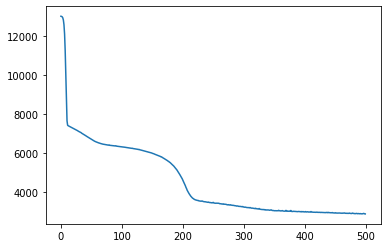

In [72]:
plt.plot(model.history.history['mae'])

In [73]:
model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 3084.3022 - mae: 3084.3022


[3084.30224609375, 3084.30224609375]

In [82]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [77]:
x = df.drop(columns=['id', 'charges'])
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [83]:
mdl = RandomForestRegressor()
mdl.fit(x_train, y_train)

RandomForestRegressor()

In [84]:
y_pred = mdl.predict(x_test)
mean_absolute_error(y_pred, y_test)

2580.468769461315